## QOL

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Global settings for plot display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':12,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })


In [3]:
df = pd.read_csv('data/qol.csv')
df.head()

,gender,batch,qol_1,qol_2,qol_3,qol_4,qol_5,qol_6,qol_7,qol_8,...,qol_17,qol_18,qol_19,qol_20,qol_21,qol_22,qol_23,qol_24,qol_25,qol_26
0,F,Final,5,5,5,5,5,5,5,5,...,5,5,5,1,1,5,5,5,5,1
1,M,Final,4,4,3,3,4,4,4,4,...,4,4,3,4,1,3,4,4,4,3
2,M,Final,4,4,3,2,4,4,3,3,...,3,3,3,3,2,3,3,4,4,4
3,F,Final,4,4,2,1,5,4,3,5,...,5,5,5,2,5,4,5,5,5,5
4,F,Final,3,2,2,1,4,3,3,4,...,2,3,3,4,3,4,4,4,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  194 non-null    object
 1   batch   194 non-null    object
 2   qol_1   194 non-null    int64 
 3   qol_2   194 non-null    int64 
 4   qol_3   194 non-null    int64 
 5   qol_4   194 non-null    int64 
 6   qol_5   194 non-null    int64 
 7   qol_6   194 non-null    int64 
 8   qol_7   194 non-null    int64 
 9   qol_8   194 non-null    int64 
 10  qol_9   194 non-null    int64 
 11  qol_10  194 non-null    int64 
 12  qol_11  194 non-null    int64 
 13  qol_12  194 non-null    int64 
 14  qol_13  194 non-null    int64 
 15  qol_14  194 non-null    int64 
 16  qol_15  194 non-null    int64 
 17  qol_16  194 non-null    int64 
 18  qol_17  194 non-null    int64 
 19  qol_18  194 non-null    int64 
 20  qol_19  194 non-null    int64 
 21  qol_20  194 non-null    int64 
 22  qol_21  194 non-null    in

## Inversing scores for Question 3, 4 and 26

In [5]:
inv_dict = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
df[['qol_3', 'qol_4', 'qol_26']] = df[['qol_3', 'qol_4', 'qol_26']].replace(inv_dict)

In [6]:
df.head()

,gender,batch,qol_1,qol_2,qol_3,qol_4,qol_5,qol_6,qol_7,qol_8,...,qol_17,qol_18,qol_19,qol_20,qol_21,qol_22,qol_23,qol_24,qol_25,qol_26
0,F,Final,5,5,1,1,5,5,5,5,...,5,5,5,1,1,5,5,5,5,5
1,M,Final,4,4,3,3,4,4,4,4,...,4,4,3,4,1,3,4,4,4,3
2,M,Final,4,4,3,4,4,4,3,3,...,3,3,3,3,2,3,3,4,4,2
3,F,Final,4,4,4,5,5,4,3,5,...,5,5,5,2,5,4,5,5,5,1
4,F,Final,3,2,4,5,4,3,3,4,...,2,3,3,4,3,4,4,4,3,4


## Total scores

In [7]:
df['total'] = df.iloc[:, 2:28].sum(axis=1)
df.head()

,gender,batch,qol_1,qol_2,qol_3,qol_4,qol_5,qol_6,qol_7,qol_8,...,qol_18,qol_19,qol_20,qol_21,qol_22,qol_23,qol_24,qol_25,qol_26,total
0,F,Final,5,5,1,1,5,5,5,5,...,5,5,1,1,5,5,5,5,5,114
1,M,Final,4,4,3,3,4,4,4,4,...,4,3,4,1,3,4,4,4,3,93
2,M,Final,4,4,3,4,4,4,3,3,...,3,3,3,2,3,3,4,4,2,84
3,F,Final,4,4,4,5,5,4,3,5,...,5,5,2,5,4,5,5,5,1,116
4,F,Final,3,2,4,5,4,3,3,4,...,3,3,4,3,4,4,4,3,4,93


## Total scores categories

In [17]:
bins = [0, 26, 51, 76, 101, 130]
labels = ['0-25', '26-50', '51-75', '76-100', '101-130']
df['total_cat'] = pd.cut(df['total'], bins=bins, labels=labels, right=False)

In [18]:
df.head()

,gender,batch,qol_1,qol_2,qol_3,qol_4,qol_5,qol_6,qol_7,qol_8,...,qol_19,qol_20,qol_21,qol_22,qol_23,qol_24,qol_25,qol_26,total,total_cat
0,F,Final,5,5,1,1,5,5,5,5,...,5,1,1,5,5,5,5,5,114,101-130
1,M,Final,4,4,3,3,4,4,4,4,...,3,4,1,3,4,4,4,3,93,76-100
2,M,Final,4,4,3,4,4,4,3,3,...,3,3,2,3,3,4,4,2,84,76-100
3,F,Final,4,4,4,5,5,4,3,5,...,5,2,5,4,5,5,5,1,116,101-130
4,F,Final,3,2,4,5,4,3,3,4,...,3,4,3,4,4,4,3,4,93,76-100


In [19]:
df['total'].sum()

np.int64(17120)

In [34]:
qol_total = df['total_cat'].value_counts().sort_index().drop('0-25')
qol_total 

total_cat
26-50        2
51-75       31
76-100     122
101-130     39
Name: count, dtype: int64

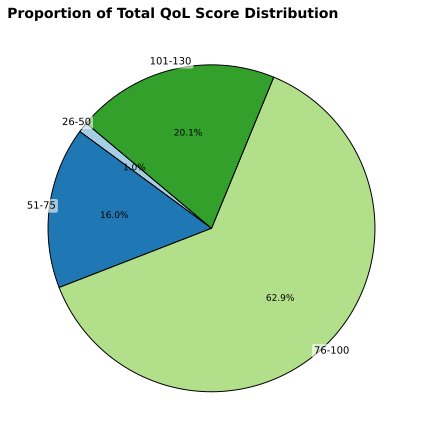

In [37]:
# Plot
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

wedges, texts, autotexts = ax.pie(
    qol_total,
    labels=qol_total.index,
    autopct='%1.1f%%',
    startangle=140,  # rotated slightly
    colors=plt.cm.Paired.colors,
    labeldistance=1.05,
    wedgeprops=dict(linewidth=1, edgecolor='black'),
    textprops=dict(fontsize=10)
)

# Improve label readability
for text in texts:
    text.set_horizontalalignment('center')
    text.set_bbox(dict(facecolor='white', edgecolor='none', alpha=0.6, boxstyle='round,pad=0.2'))

for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_color('black')

# Title
ax.set_title('Proportion of Total QoL Score Distribution', fontsize=14, fontweight='bold')

plt.show()

### Group comparisons

#### Batch

In [41]:
qol_batch = df.groupby(['total_cat', 'batch']).size().unstack().drop('0-25')
qol_batch

/tmp/ipykernel_5932/3158726660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qol_batch = df.groupby(['total_cat', 'batch']).size().unstack().drop('0-25')


batch,Final,First
total_cat,,
26-50,0,2
51-75,5,26
76-100,27,95
101-130,23,16


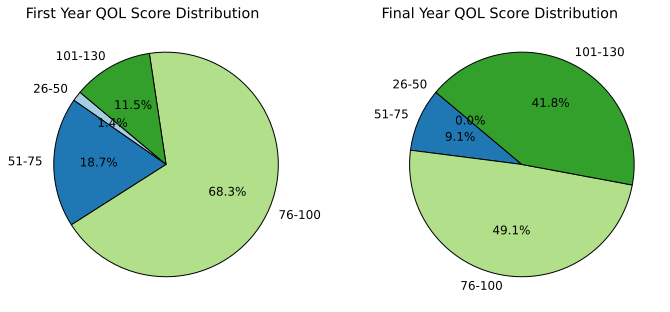

In [46]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# First pie (First years)
axs[0].pie(qol_batch['First'], labels=qol_batch.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[0].set_title('First Year QOL Score Distribution')

# Second pie (Final years)
axs[1].pie(qol_batch['Final'], labels=qol_batch.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[1].set_title('Final Year QOL Score Distribution')

# Adjust layout and show
plt.tight_layout()
plt.show()

#### Gender

In [45]:
qol_gender = df.groupby(['total_cat', 'gender']).size().unstack().drop('0-25')
qol_gender

/tmp/ipykernel_5932/3635520427.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qol_gender = df.groupby(['total_cat', 'gender']).size().unstack().drop('0-25')


gender,F,M
total_cat,,
26-50,0,2
51-75,10,21
76-100,47,75
101-130,20,19


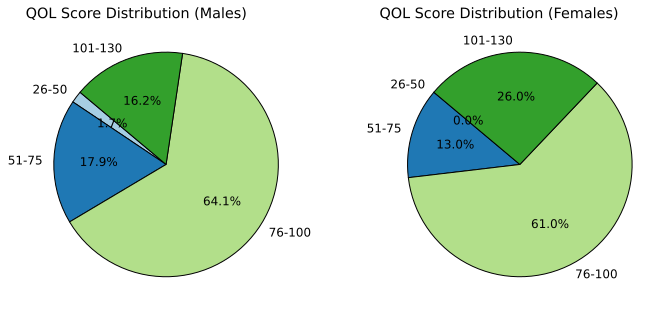

In [47]:
# plot
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), sharey=True)

# First pie (Males)
axs[0].pie(qol_gender['M'], labels=qol_gender.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[0].set_title('QOL Score Distribution (Males)')

# Second pie (Females)
axs[1].pie(qol_gender['F'], labels=qol_gender.index, autopct='%1.1f%%', startangle=140,
           colors=plt.cm.Paired.colors, labeldistance=1.1, wedgeprops=dict(linewidth=1, edgecolor='black'))
axs[1].set_title('QOL Score Distribution (Females)')

# Adjust layout and show
plt.tight_layout()
plt.show()

## Domain scores

In [48]:
domain_dict = {'Physical_health': ['qol_3', 'qol_4', 'qol_10', 'qol_15', 'qol_16', 'qol_17', 'qol_18'],
               'Psychological_health': ['qol_5', 'qol_6', 'qol_7', 'qol_11', 'qol_19', 'qol_26'],
               'Social relationships': ['qol_20', 'qol_21', 'qol_22'],
               'Environment': ['qol_8', 'qol_9', 'qol_12', 'qol_13', 'qol_14', 'qol_23', 'qol_24', 'qol_25']}


Meanings of the aforementioned domains

In [49]:
# Standard rounding: 0.5 and above rounds up, below 0.5 rounds down
def standard_round(x):
    return np.where(x >= 0, np.floor(x + 0.5), np.ceil(x - 0.5))


In [52]:
for domain, items in domain_dict.items():
    df[domain] = (df[items].mean(axis=1) * 4).apply(standard_round).astype(int)

df.head()

,gender,batch,qol_1,qol_2,qol_3,qol_4,qol_5,qol_6,qol_7,qol_8,...,qol_23,qol_24,qol_25,qol_26,total,total_cat,Physical_health,Psychological_health,Social relationships,Environment
0,F,Final,5,5,1,1,5,5,5,5,...,5,5,5,5,114,101-130,15,20,9,20
1,M,Final,4,4,3,3,4,4,4,4,...,4,4,4,3,93,76-100,14,15,11,15
2,M,Final,4,4,3,4,4,4,3,3,...,3,4,4,2,84,76-100,13,13,11,14
3,F,Final,4,4,4,5,5,4,3,5,...,5,5,5,1,116,101-130,19,15,15,20
4,F,Final,3,2,4,5,4,3,3,4,...,4,4,3,4,93,76-100,15,14,15,15


In [56]:
bins = [0, 4, 9, 13, 17, 21]
labels = ['0-3', '4-8', '9-12', '13-16', '17-20']
for domain in domain_dict.keys():
    df[domain + '_binned'] = pd.cut(df[domain], bins=bins, labels=labels, right=False)

df.head()

,gender,batch,qol_1,qol_2,qol_3,qol_4,qol_5,qol_6,qol_7,qol_8,...,total,total_cat,Physical_health,Psychological_health,Social relationships,Environment,Physical_health_binned,Psychological_health_binned,Social relationships_binned,Environment_binned
0,F,Final,5,5,1,1,5,5,5,5,...,114,101-130,15,20,9,20,13-16,17-20,9-12,17-20
1,M,Final,4,4,3,3,4,4,4,4,...,93,76-100,14,15,11,15,13-16,13-16,9-12,13-16
2,M,Final,4,4,3,4,4,4,3,3,...,84,76-100,13,13,11,14,13-16,13-16,9-12,13-16
3,F,Final,4,4,4,5,5,4,3,5,...,116,101-130,19,15,15,20,17-20,13-16,13-16,17-20
4,F,Final,3,2,4,5,4,3,3,4,...,93,76-100,15,14,15,15,13-16,13-16,13-16,13-16


In [69]:
# Convert list of series to DataFrame with domain names as index
domain_counts_df = pd.concat([df[domain + '_binned'].value_counts() for domain in domain_dict.keys()], 
                            keys=domain_dict.keys(), axis=1).sort_index()
domain_counts_df

,Physical_health,Psychological_health,Social relationships,Environment
0-3,0,0,0,0
4-8,6,8,33,8
9-12,50,59,71,45
13-16,109,94,60,97
17-20,29,33,30,44


The domain scores should fall between 4 and 20 as the manual suggests. so lets drop the first row.

In [70]:
domain_counts_df = domain_counts_df.drop('0-3')
domain_counts_df

,Physical_health,Psychological_health,Social relationships,Environment
4-8,6,8,33,8
9-12,50,59,71,45
13-16,109,94,60,97
17-20,29,33,30,44


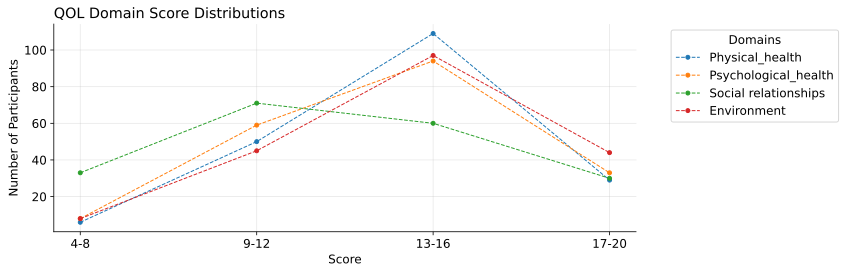

In [71]:
# Create line chart with domains as separate lines
plt.figure(figsize=(12, 4))

# Plot each domain as a separate line
for domain in domain_counts_df.columns:
    plt.plot(domain_counts_df.index, domain_counts_df[domain], marker='o', markersize=4, label=domain, linewidth=1, linestyle='--')

plt.title('QOL Domain Score Distributions')
plt.xlabel('Score')
plt.ylabel('Number of Participants')
plt.legend(title='Domains', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [72]:
final_domain_df = df[['batch', 'Physical_health_binned', 'Psychological_health_binned', 'Social relationships_binned', 'Environment_binned']]
final_domain_df.head()

,batch,Physical_health_binned,Psychological_health_binned,Social relationships_binned,Environment_binned
0,Final,13-16,17-20,9-12,17-20
1,Final,13-16,13-16,9-12,13-16
2,Final,13-16,13-16,9-12,13-16
3,Final,17-20,13-16,13-16,17-20
4,Final,13-16,13-16,13-16,13-16


In [75]:
# Convert list of series to DataFrame with domain names as index
final_domain_counts_df = pd.concat([final_domain_df[domain + '_binned'].value_counts() for domain in domain_dict.keys()], 
                            keys=domain_dict.keys(), axis=1).sort_index().fillna(0).astype(int).drop('0-3')
final_domain_counts_df

,Physical_health,Psychological_health,Social relationships,Environment
4-8,6,8,33,8
9-12,50,59,71,45
13-16,109,94,60,97
17-20,29,33,30,44


In [76]:
for domain in final_domain_counts_df.columns:
    final_domain_counts_df[domain] = final_domain_counts_df[domain] / final_domain_counts_df[domain].sum() * 100

final_domain_counts_df

,Physical_health,Psychological_health,Social relationships,Environment
4-8,3.092784,4.123711,17.010309,4.123711
9-12,25.773196,30.412371,36.597938,23.195876
13-16,56.185567,48.453608,30.927835,50.000000
17-20,14.948454,17.010309,15.463918,22.680412


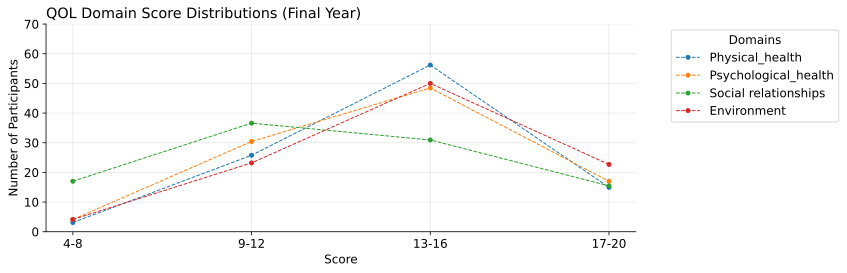

In [77]:
# Create line chart with domains as separate lines
plt.figure(figsize=(12, 4))

# Plot each domain as a separate line
for domain in final_domain_counts_df.columns:
    plt.plot(final_domain_counts_df.index, final_domain_counts_df[domain], marker='o', markersize=4, label=domain, linewidth=1, linestyle='--')

plt.title('QOL Domain Score Distributions (Final Year)')
plt.xlabel('Score')
plt.ylabel('Number of Participants')
plt.legend(title='Domains', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.ylim(0, 70)

plt.tight_layout()
plt.show()

In [79]:
first_domain_df = df[df['batch'] == 'First'][['Physical_health_binned', 'Psychological_health_binned', 'Social relationships_binned', 'Environment_binned']].reset_index(drop=True)
first_domain_df.head()

,Physical_health_binned,Psychological_health_binned,Social relationships_binned,Environment_binned
0,13-16,13-16,13-16,13-16
1,13-16,9-12,13-16,17-20
2,9-12,9-12,9-12,17-20
3,13-16,9-12,4-8,13-16
4,13-16,9-12,4-8,13-16


In [80]:
# Convert list of series to DataFrame with domain names as index
first_domain_counts_df = pd.concat([first_domain_df[domain + '_binned'].value_counts() for domain in domain_dict.keys()], 
                            keys=domain_dict.keys(), axis=1).sort_index().fillna(0).astype(int).drop('0-3')
first_domain_counts_df

,Physical_health,Psychological_health,Social relationships,Environment
4-8,4,6,27,7
9-12,41,49,55,38
13-16,82,66,40,70
17-20,12,18,17,24


In [82]:
for domain in first_domain_counts_df.columns:
    first_domain_counts_df[domain] = first_domain_counts_df[domain] / first_domain_counts_df[domain].sum() * 100

first_domain_counts_df

,Physical_health,Psychological_health,Social relationships,Environment
4-8,2.877698,4.316547,19.424460,5.035971
9-12,29.496403,35.251799,39.568345,27.338129
13-16,58.992806,47.482014,28.776978,50.359712
17-20,8.633094,12.949640,12.230216,17.266187


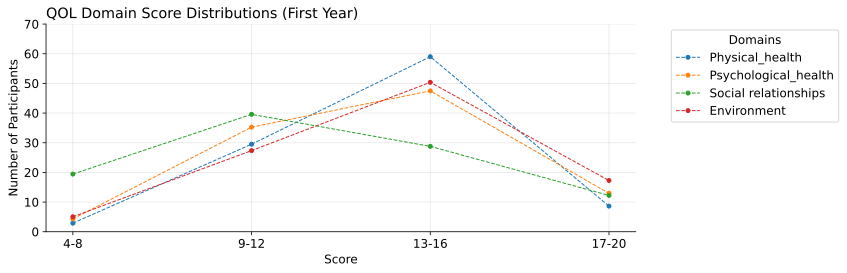

In [83]:
# Create line chart with domains as separate lines
plt.figure(figsize=(12, 4))

# Plot each domain as a separate line
for domain in domain_counts_df.columns:
    plt.plot(first_domain_counts_df.index, first_domain_counts_df[domain], marker='o', markersize=4, label=domain, linewidth=1, linestyle='--')

plt.title('QOL Domain Score Distributions (First Year)')
plt.xlabel('Score')
plt.ylabel('Number of Participants')
plt.legend(title='Domains', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.ylim(0, 70)

plt.tight_layout()
plt.show()